# Bloom Filter

### This notebook demonstrates the implementation of Bloom filter, hash functions family and their testing, as well as HPC experiments performed as a part of the project.

*The notebook assumes you have already familiarized yourself with the implementation part (**bloom_filter** and **data** folders) and continues with hash function testing*.

## Hash function testing

Let's begin by importing the hash functions and data provider methods and see how each hash function performs on different types of data.

Testing with get_natural_language_words
MD5Hash - Chi-squared: 9888.00, p-value: 0.7832, Standard Deviation: 0.99
MurmurHash - Chi-squared: 10192.00, p-value: 0.0868, Standard Deviation: 1.01
CityHash - Chi-squared: 9964.00, p-value: 0.5960, Standard Deviation: 1.00
JenkinsOneAtATimeHash - Chi-squared: 9844.00, p-value: 0.8637, Standard Deviation: 0.99
Sha256Hash - Chi-squared: 9938.00, p-value: 0.6655, Standard Deviation: 1.00


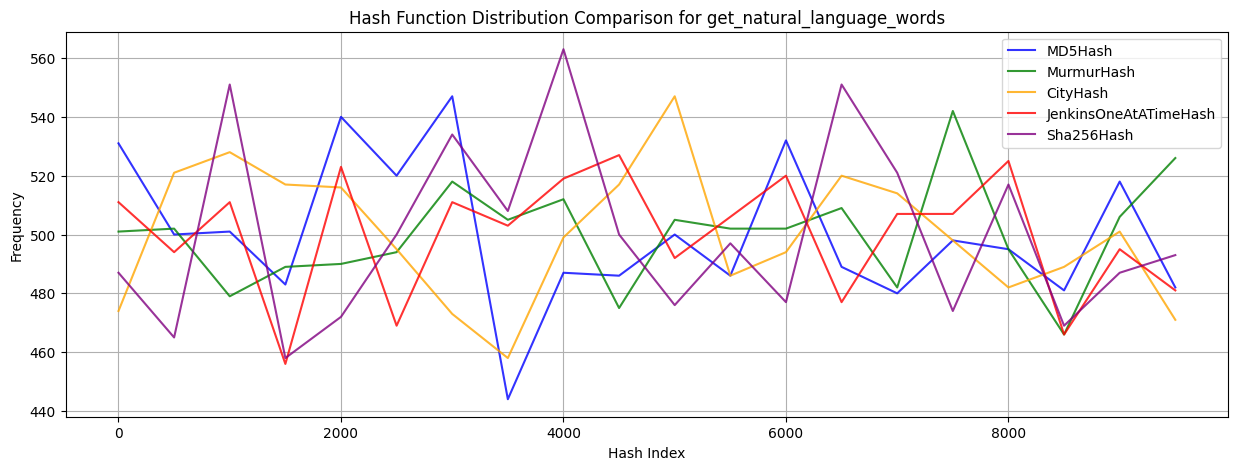

Testing with get_random_strings
MD5Hash - Chi-squared: 10454.00, p-value: 0.0008, Standard Deviation: 1.02
MurmurHash - Chi-squared: 10142.00, p-value: 0.1560, Standard Deviation: 1.01
CityHash - Chi-squared: 10012.00, p-value: 0.4615, Standard Deviation: 1.00
JenkinsOneAtATimeHash - Chi-squared: 10100.00, p-value: 0.2368, Standard Deviation: 1.00
Sha256Hash - Chi-squared: 10212.00, p-value: 0.0668, Standard Deviation: 1.01


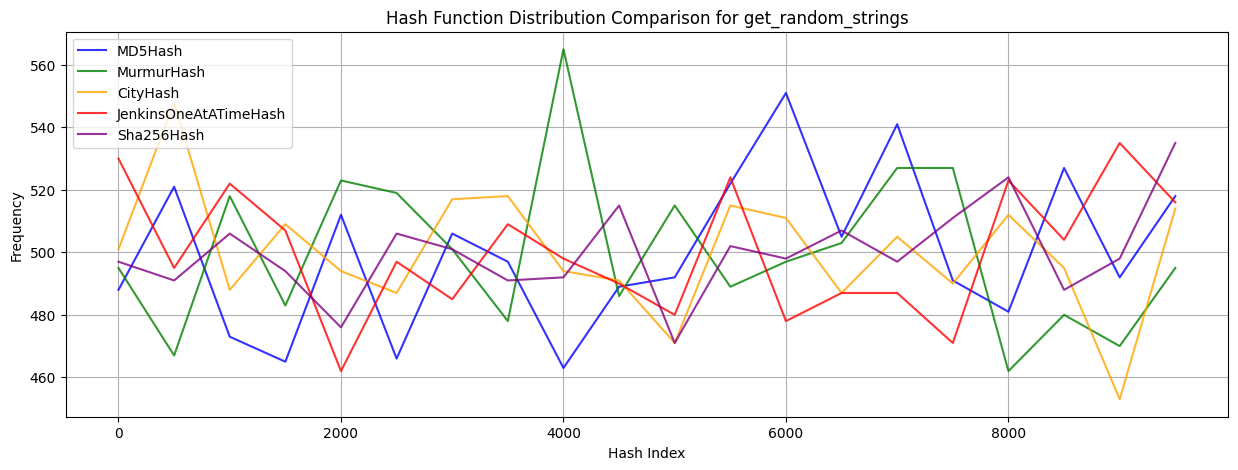

Testing with get_dna_sequences
MD5Hash - Chi-squared: 10300.00, p-value: 0.0173, Standard Deviation: 1.01
MurmurHash - Chi-squared: 9938.00, p-value: 0.6655, Standard Deviation: 1.00
CityHash - Chi-squared: 9954.00, p-value: 0.6232, Standard Deviation: 1.00
JenkinsOneAtATimeHash - Chi-squared: 9814.00, p-value: 0.9052, Standard Deviation: 0.99
Sha256Hash - Chi-squared: 10204.00, p-value: 0.0743, Standard Deviation: 1.01


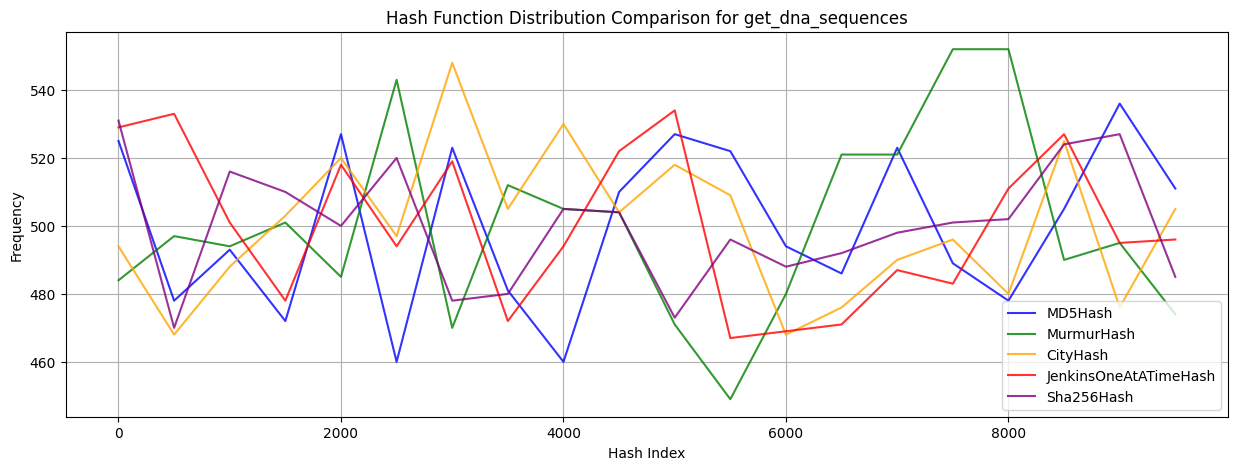

Testing with get_urls
MD5Hash - Chi-squared: 10024.00, p-value: 0.4280, Standard Deviation: 1.00
MurmurHash - Chi-squared: 9824.00, p-value: 0.8925, Standard Deviation: 0.99
CityHash - Chi-squared: 9906.00, p-value: 0.7438, Standard Deviation: 1.00
JenkinsOneAtATimeHash - Chi-squared: 9940.00, p-value: 0.6603, Standard Deviation: 1.00
Sha256Hash - Chi-squared: 10104.00, p-value: 0.2282, Standard Deviation: 1.01


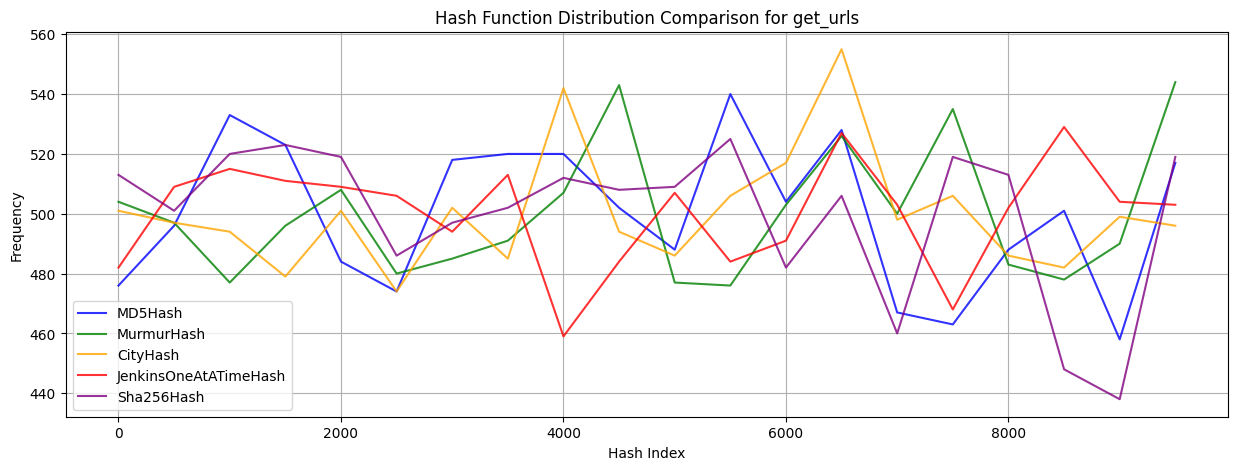

In [79]:
from bloom_filter.hash_functions.md5_hash import MD5Hash
from bloom_filter.hash_functions.murmur_hash import MurmurHash
from bloom_filter.hash_functions.city_hash import CityHash
from bloom_filter.hash_functions.jenkins_one_at_a_time_hash import JenkinsOneAtATimeHash
from bloom_filter.hash_functions.sha256_hash import Sha256Hash

from data.data_generator import get_natural_language_words, get_random_strings, get_dna_sequences, get_urls

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chisquare
import random
random.seed(42) # For reproducibility

all_hash_functions = [MD5Hash(), MurmurHash(), CityHash(), JenkinsOneAtATimeHash(), Sha256Hash()]
plot_colors = ['blue', 'green', 'orange', 'red', 'purple']
# Get data provider methods as objects to automatize testing
data_providers = [get_natural_language_words, get_random_strings, get_dna_sequences, get_urls]

hashing_size = 10000
number_of_hashes = 10000

for data_provider in data_providers:
    print(f"Testing with {data_provider.__name__}")
    # Prepare plot
    plt.figure(figsize=(15, 5))
    
    # Same dataset for each function
    dataset = data_provider(number_of_hashes)
    
    for plot_color, hash_fn in zip(plot_colors, all_hash_functions):
        hash_fn_name = hash_fn.__class__.__name__
        distribution = [0] * hashing_size
        for word in dataset:
            index = hash_fn.hash(word) % hashing_size
            distribution[index] += 1

        # Aggregation by binning in 20 bins
        bin_size = int(hashing_size/20)
        aggregated_distribution = [
            sum(distribution[i:i + bin_size]) for i in range(0, hashing_size, bin_size)
        ]
        aggregated_x = range(0, hashing_size, bin_size)
        plt.plot(aggregated_x, aggregated_distribution, label=hash_fn_name, color=plot_color, alpha=0.8, linewidth=1.5)

        # Statistical analysis is performed to see how close the distributions are to normal
        expected_mean = np.mean(distribution)
        chi2, p = chisquare(distribution)
        standard_deviation = np.std(distribution)
        print(f"{hash_fn_name} - Chi-squared: {chi2:.2f}, p-value: {p:.4f}, Standard Deviation: {standard_deviation:.2f}")

    
    plt.xlabel('Hash Index')
    plt.ylabel('Frequency')
    plt.title(f"Hash Function Distribution Comparison for {data_provider.__name__}")
    plt.legend()
    plt.grid(True)
    plt.show()

### Analysis of the results

- For the first type of data - natural English words, the best choices based on the chi-squared statistics and p-values are JenkinsOneAtATimeHash and MD5 as both provide high p-values. SHA256 and CityHash also have a good distribution. MurmurHash has a slightly worse performance.
- For random strings, CityHash performs the best, followed by JenkinsOneAtATimeHash, Murmurhash and SHA-256. MD5 has a low p-value, so it may not be suitable for this use case.
- In DNA sequence testing, we can observe that the best fits are JenkinsOneAtATimeHash, MurmurHash and Cityhash with pretty high p-values. SHA256 performs OK, whereas MD5 is not that uniformly distributed.
- Lastly, for simulated URLs, all hashing functions were within acceptable limits, with the best performing being MurmurHash and the least SHA-256.

## Time and space complexity
This part is discussed in README.md.

## Benchmarking

This part covers question 6.

Let's first benchmark locally with a smaller dataset. We will use all 4 types of data for this experiment.

To compare the performance of the implementation, we will also benchmark two more data structures commonly used for this use case: Hash set (Hash table) and Python's built-in dynamic list. 

Initially, it was planned to also test versus Cuckoo filter, another probabilistic-type container, but then we would have to control for its error rate and other design details which is out of scope. Instead, we go with hashmaps and Python lists - both are very good picks so we may be able see the benefits of the Bloom filter but also we may not due to high optimization of the other two structures.

Here is the script we can use for the task with two main functions - benchmarking and visualising the results:

Results for get_natural_language_words


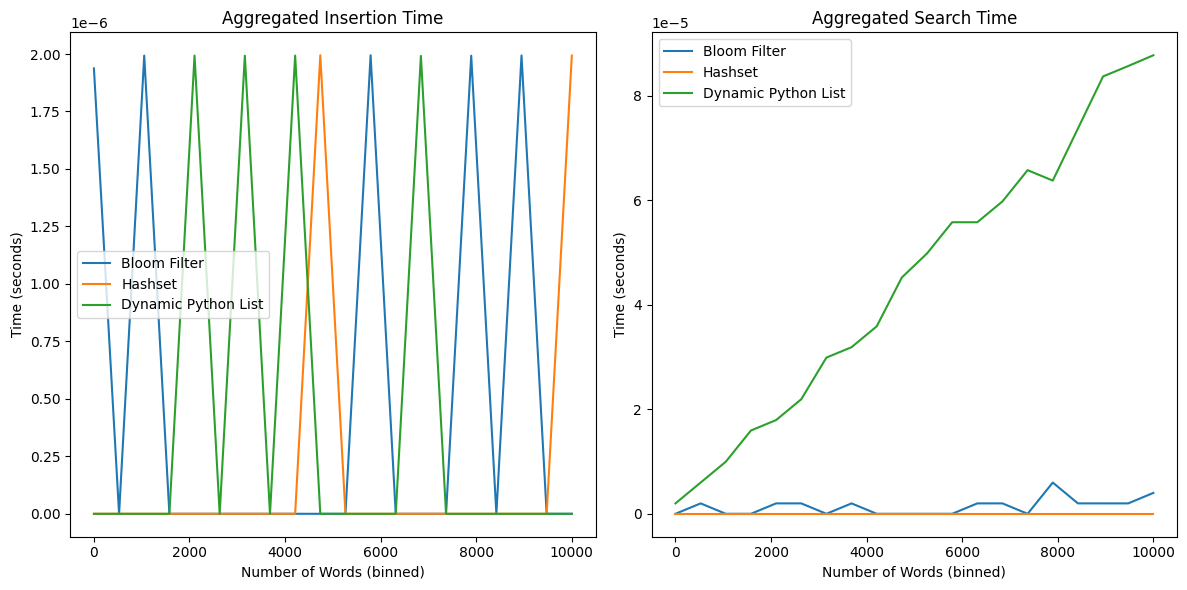

Results for get_random_strings


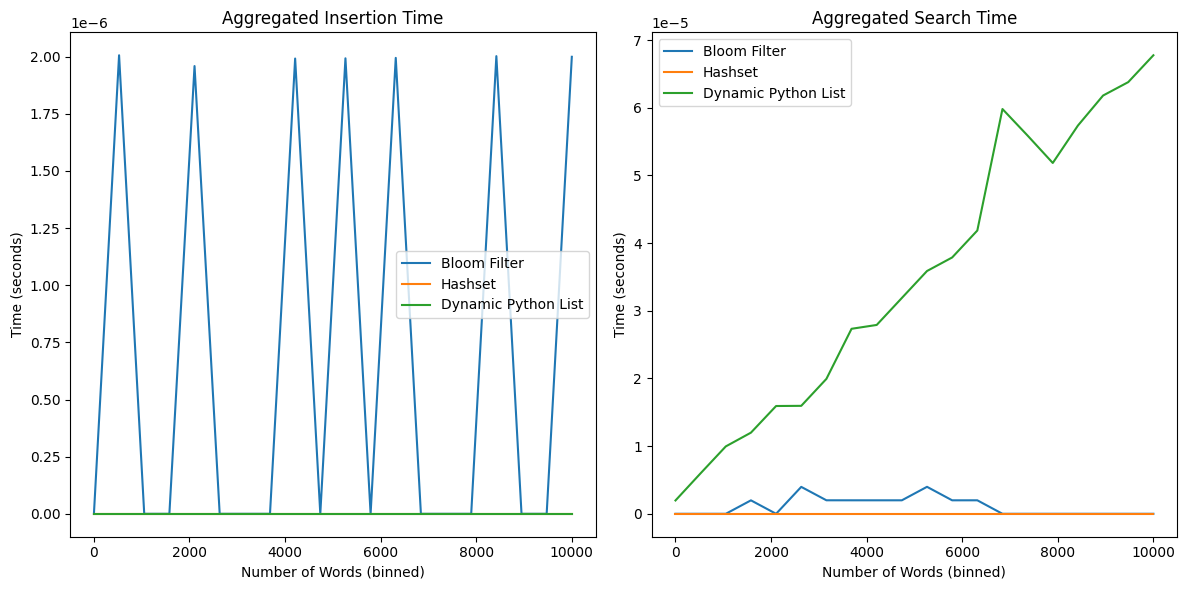

Results for get_dna_sequences


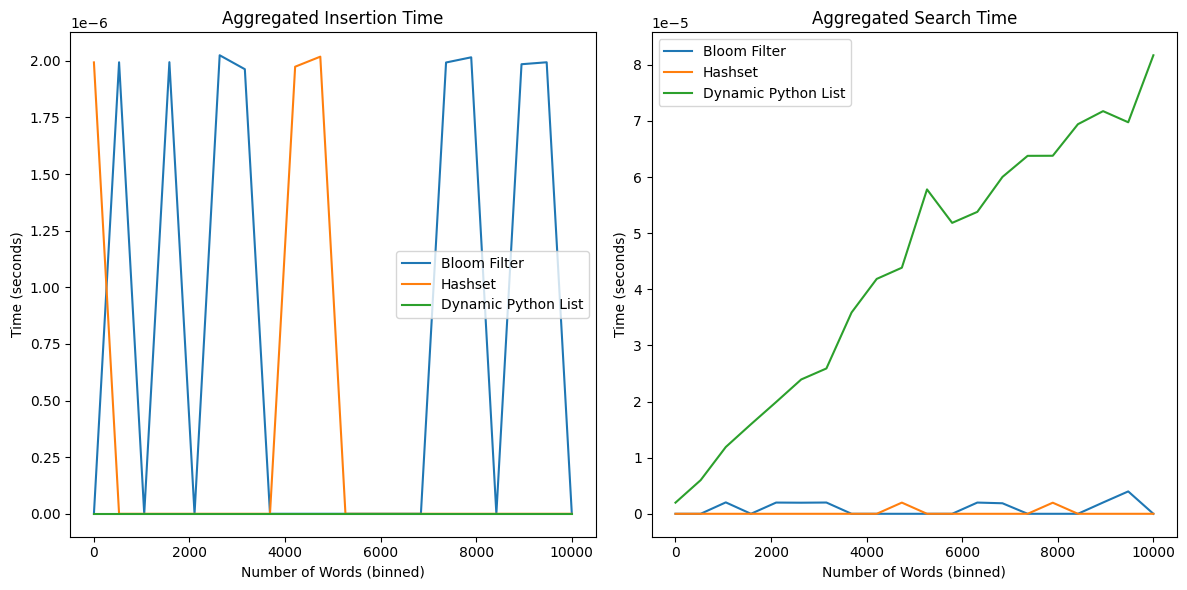

Results for get_urls


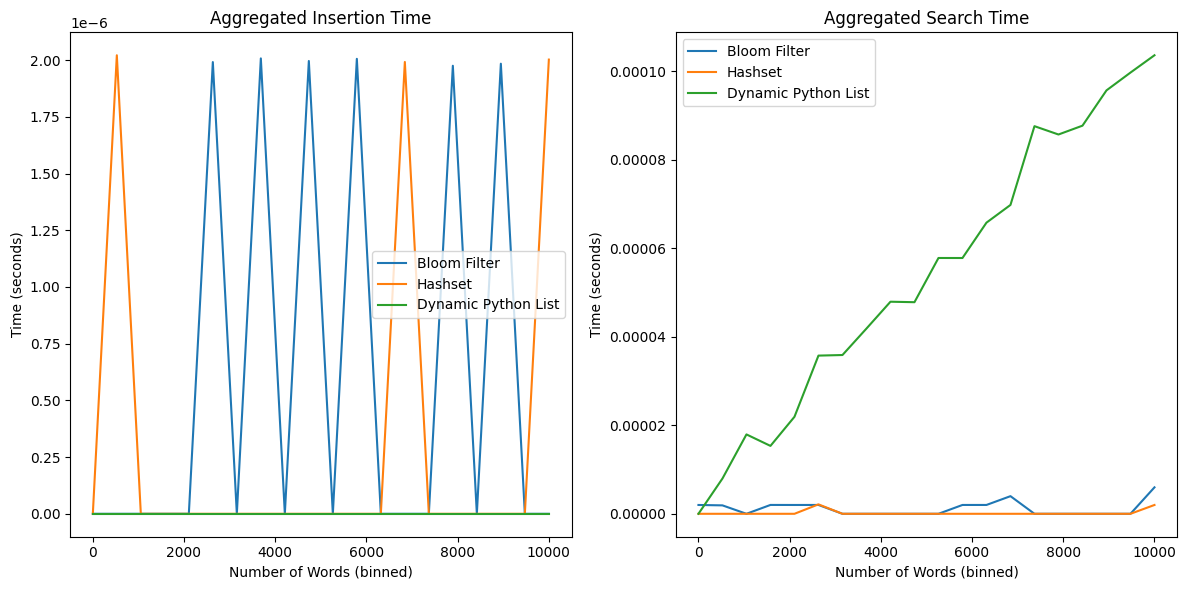

In [111]:
import json
import os
from matplotlib import pyplot as plt
from bloom_filter.bloom_filter import BloomFilter
import time
import numpy as np

from bloom_filter.hash_functions.murmur_hash import MurmurHash
from bloom_filter.hash_functions.city_hash import CityHash
from data.data_generator import get_natural_language_words, get_random_strings, get_dna_sequences, get_urls

def benchmark(words, bf_bit_capacity, bf_word_capacity, bf_hash_functions):
    # print(f"Benchmarking with {bf_bit_capacity}, {bf_word_capacity}, {bf_hash_functions}")
    
    # Set up the Bloom filter, hash table and Cuckoo filter with the given parameters
    bloom_filter = BloomFilter(bf_bit_capacity, bf_word_capacity, bf_hash_functions)
    hash_table = set()
    python_dynamic_list = []

    # Benchmark add/insert
    bloom_insert_timings = []
    hashset_insert_timings = []
    list_insert_timings = []

    for word in words:
        start_time_bf = time.time()
        bloom_filter.add_item(word)
        delta_time_bf = time.time() - start_time_bf
        bloom_insert_timings.append(delta_time_bf)

        start_time_hashset = time.time()
        hash_table.add(word)
        delta_time_hashset = time.time() - start_time_hashset
        hashset_insert_timings.append(delta_time_hashset)

        start_time_list = time.time()
        python_dynamic_list.append(word)
        delta_time_list = time.time() - start_time_list
        list_insert_timings.append(delta_time_list)

    # Benchmark search
    bloom_search_timings = []
    hashset_search_timings = []
    list_search_timings = []

    for word in words:
        start_time_bf = time.time()
        bloom_filter.add_item(word)
        delta_time_bf = time.time() - start_time_bf
        bloom_search_timings.append(delta_time_bf)

        start_time_hashset = time.time()
        word in hash_table
        delta_time_hashset = time.time() - start_time_hashset
        hashset_search_timings.append(delta_time_hashset)

        start_time_list = time.time()
        word in python_dynamic_list
        delta_time_list = time.time() - start_time_list
        list_search_timings.append(delta_time_list)

    return (bloom_insert_timings, hashset_insert_timings, list_insert_timings, bloom_search_timings, hashset_search_timings, list_search_timings)

def plot_benchmark_results(results, total_number_of_words):
    bloom_insert, hashset_insert, list_insert, bloom_search, hashset_search, list_search = results
    # Change number of bins if necessary
    number_of_bins = 20
    
    x = np.linspace(1, total_number_of_words, number_of_bins)
    def aggregate(data, number_of_bins):
        return np.array_split(data, number_of_bins)

    agg_bloom_insert = [np.mean(bin) for bin in np.array_split(bloom_insert, number_of_bins)]
    agg_hashset_insert = [np.mean(bin) for bin in np.array_split(hashset_insert, number_of_bins)]
    agg_list_insert = [np.mean(bin) for bin in np.array_split(list_insert, number_of_bins)]
    agg_bloom_search = [np.mean(bin) for bin in np.array_split(bloom_search, number_of_bins)]
    agg_hashset_search = [np.mean(bin) for bin in np.array_split(hashset_search, number_of_bins)]
    agg_list_search = [np.mean(bin) for bin in np.array_split(list_search, number_of_bins)]

    plt.figure(figsize=(12, 6))

    # Plot insertion
    plt.subplot(1, 2, 1)
    plt.plot(x, agg_bloom_insert, label='Bloom Filter')
    plt.plot(x, agg_hashset_insert, label='Hashset')
    plt.plot(x, agg_list_insert, label='Dynamic Python List')
    plt.title('Aggregated Insertion Time')
    plt.xlabel('Number of Words (binned)')
    plt.ylabel('Time (seconds)')
    plt.legend()

    # Plot search
    plt.subplot(1, 2, 2)
    plt.plot(x, agg_bloom_search, label='Bloom Filter')
    plt.plot(x, agg_hashset_search, label='Hashset')
    plt.plot(x, agg_list_search, label='Dynamic Python List')
    plt.title('Aggregated Search Time')
    plt.xlabel('Number of Words (binned)')
    plt.ylabel('Time (seconds)')
    plt.legend()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Set benchmarking parameters here
    bit_capacity = 10 ** 3
    number_of_words_by_design = 10 ** 3
    actual_number_of_words = 10 ** 4
    hash_fns = [MurmurHash(), CityHash()]

    # Get words from data sources
    data_providers = [get_natural_language_words, get_random_strings, get_dna_sequences, get_urls]

    all_results = []
    # Benchmark for each data source
    for data_provider in data_providers:
        print(f"Results for {data_provider.__name__}")
        results = benchmark(data_provider(actual_number_of_words), bit_capacity, number_of_words_by_design, hash_fns)
        all_results.append(results)
        plot_benchmark_results(results, actual_number_of_words)


We can observe from the results that, when tested with bit size = 10^3, word number by design = 10^3 and actual words fed = 10^4, the Bloom filter does not perform very stable in virtually any of the 4 data types when it comes to insertion, but maintains a robust response time for searching. Python's dynamic list performs relatively well on insertion time, but on search time it scales very fast when faced with a growing number of elements and both hashset and Bloom filter outperform it.

Now, let's add the script above to ``benchmark.py`` and add some little changes. Firstly, let's increase the power of each parameter by 1.

```
    bit_capacity = 10 ** 4
    number_of_words_by_design = 10 ** 4
    actual_number_of_words = 10 ** 5
```

Then, we will also save all results and relay the JSON output into a file:

```
    all_results = []
    
    os.makedirs("results", exist_ok=True)
    with open("results/benchmark_results_actual_10_5.json", "w") as file:
        json.dump(all_results, file, indent=4)
```

Finally, we run the job script on HPC architecture (job script and output is available in the root directory in the repository). After the job finishes, we download the file from the server and we come back to the Jupyter notebook to visualise the results.

English words data


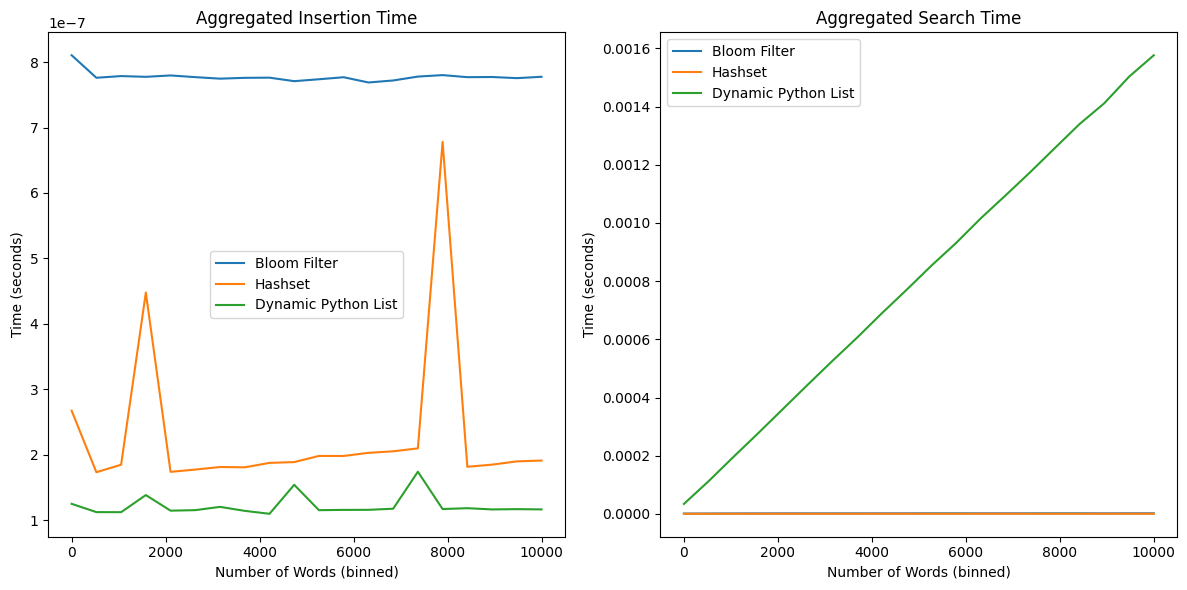

Random strings data


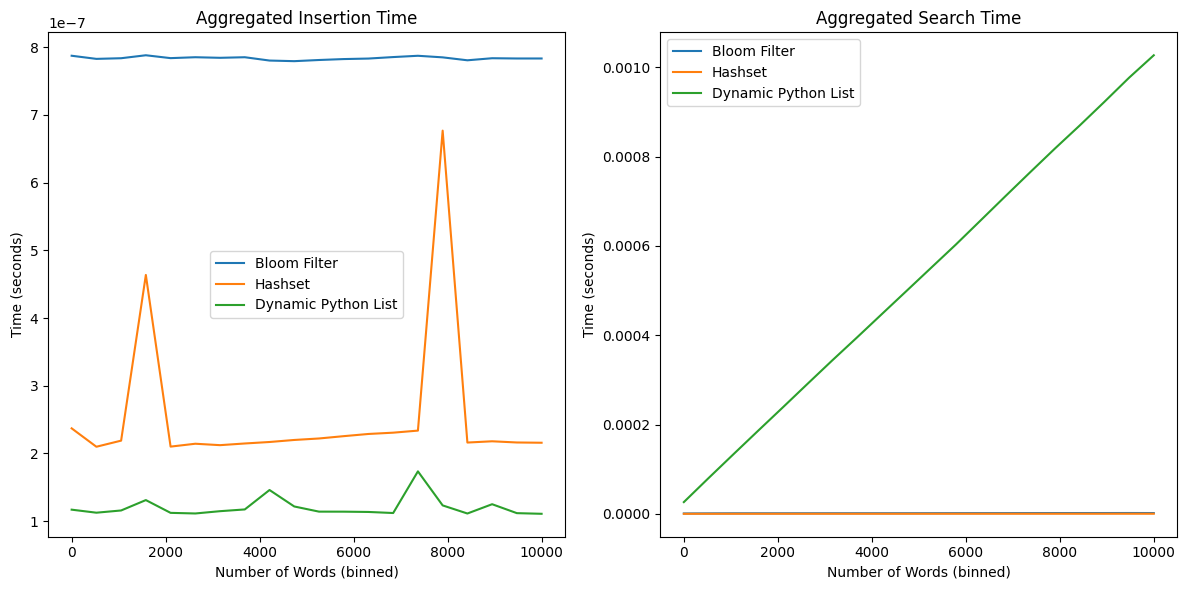

DNA Sequence data


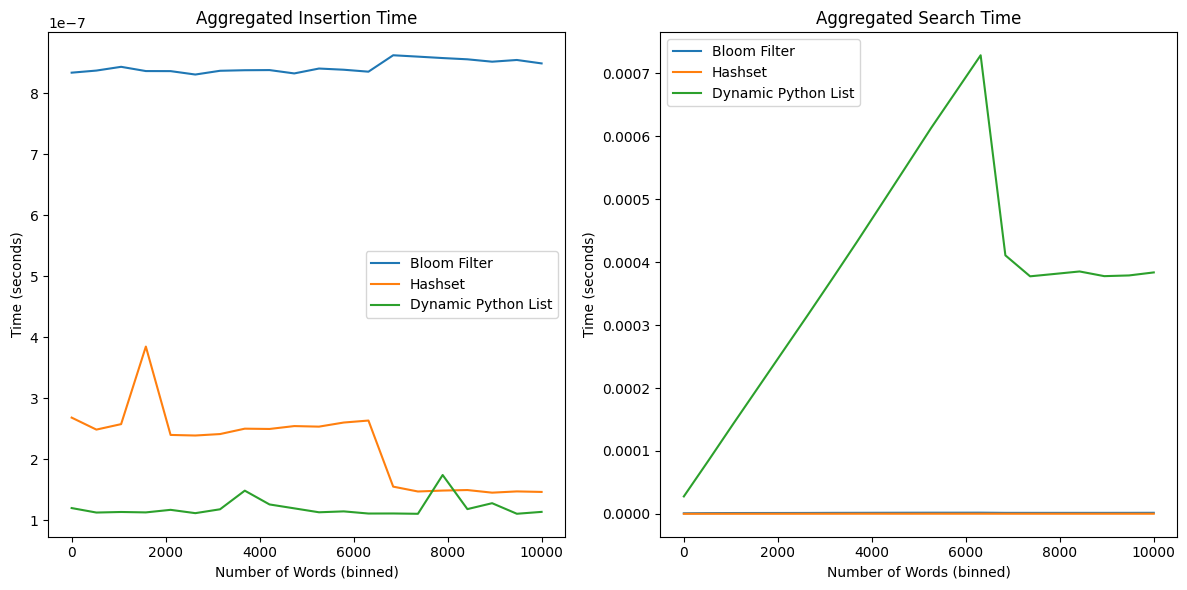

URL Data


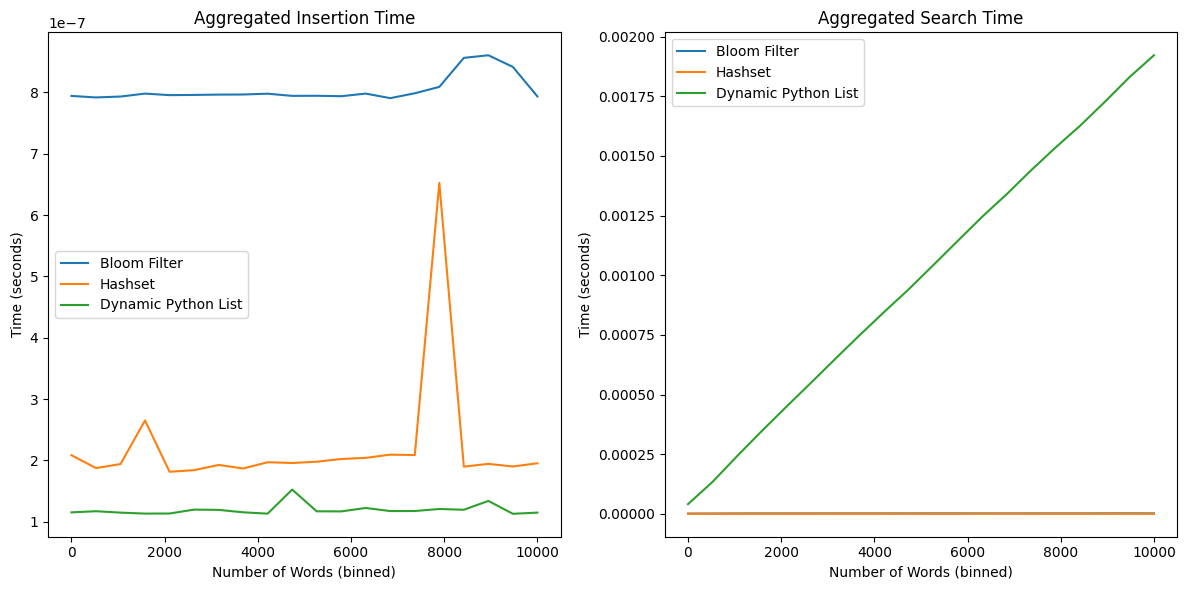

In [116]:
with open("results/benchmark_results_actual_10_5.json", "r") as file:
    results = json.load(file)
    
    # Clarification which data type graphs refer to
    data_type_name = ["URL Data", "DNA Sequence data", "Random strings data", "English words data"]
    
    for result_per_data_type in results:
        print(data_type_name.pop())
        plot_benchmark_results(result_per_data_type, actual_number_of_words)
        

What we observe from the second run gives us discerning and meaningful info about insertion time that we didnt have before, and confirms our assumptions about search time where nothing much has changed. It occurs that Python lists provides the fastest insertion time in all 4 categories, followed by hash tables, and is significantly faster than bloom filters. However, the real power of Bloom filters can be seen in search time which remains extremely low and constant, whereas the list struggles in that domain.